In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
import os
import shutil
from random import shuffle

# Create train and validation folders
train_dir = '/content/gdrive/MyDrive/DME_train'
val_dir = '/content/gdrive/MyDrive/DME_val'

for folder in [train_dir, val_dir]:
    class_0_folder = os.path.join(folder, 'class_0')
    class_1_folder = os.path.join(folder, 'class_1')

    if not os.path.exists(class_0_folder):
        os.makedirs(class_0_folder)

    if not os.path.exists(class_1_folder):
        os.makedirs(class_1_folder)

# Organize images in DME_train and DME_val into respective class folders
for folder in [train_dir, val_dir]:
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    
    for file_name in files:
        src_path = os.path.join(folder, file_name)
        # Determine class label (Replace this with the correct condition to identify class labels)
        class_label = 'class_0' if file_name.startswith('0') else 'class_1'
        dest_path = os.path.join(folder, class_label, file_name)
        shutil.move(src_path, dest_path)


In [30]:
# Define image size and batch size
IMG_SIZE = 128
BATCH_SIZE = 32

# Define data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Change this line
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Change this line
)


# Load pre-trained model
base_model = tf.keras.applications.VGG16(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)  # Change this line

# Create model
model = tf.keras.models.Model(base_model.input, x)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])  # Change the loss function here

# Train model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Found 1208 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


Epoch 1/10
38/38 [==============================] - 236s 6s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
38/38 [==============================] - 199s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
38/38 [==============================] - 201s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
38/38 [==============================] - 201s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
38/38 [==============================] - 198s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
38/38 [==============================] - 199s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 200s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l

Found 302 images belonging to 2 classes.
302/302 [==============================] - 43s 142ms/step


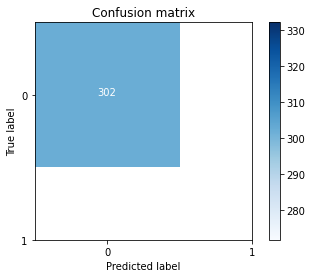

In [32]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on validation data
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',  # Change this line
    shuffle=False
)

y_true = val_data.labels
y_pred = model.predict(val_data)
y_pred_class = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_class)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted label')
plt.ylabel('True label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

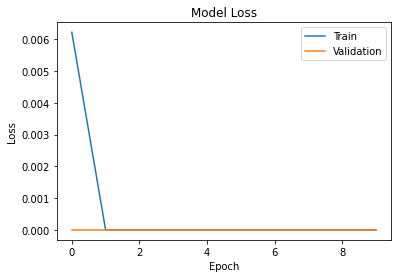

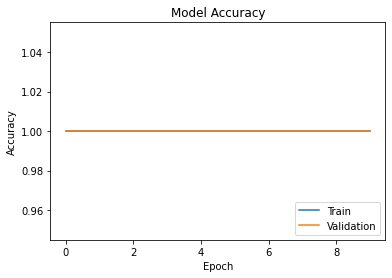

In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Plot the Training Loss and Accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()